# ROC curve comparison PyMC3, susie, varbvs, logit
ROC curve for comparing methods

In [1]:
import pandas as pd, numpy as np
import os
from collections import Counter
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/data")

In [2]:
varbvs = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.varbvs.all.blocks.pip.csv", header = None, names = ["varbvs_pip"])
susie = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.SuSiE.L_1.susie.all.blocks.pip.csv", header = None, names = ["susie_pip"])
logit = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.logit.all.blocks.pip.csv", header = None, names = ["logit_pip"])

In [3]:
beta = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.shape0.0.scale1.0.beta", header = None, names = ["beta"])
index = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.block1.forsimu.index.csv", header = None, names = ["s", "e"], sep = '\t')

In [4]:
b1 = list()
for i, x in index.iterrows():
    b1.extend([j for j in range(x["s"], x["e"]+1)])

In [5]:
len(b1)

2285

In [6]:
beta = beta.iloc[b1]
beta = beta.set_index([[i for i in range(beta.shape[0])]])

In [7]:
beta.shape

(2285, 1)

In [8]:
res = pd.concat([beta, varbvs, susie, logit], axis = 1)

In [20]:
res.shape

(2285, 5)

In [10]:
res["beta1"] = res["beta"].apply(lambda x: 1 if x != 0 else 0)

In [29]:
res.head(10)

,beta,varbvs_pip,susie_pip,logit_pip,beta1
0,-0.000000,0.072735,0.0,0.125,0
1,-0.000000,0.072734,0.0,0.125,0
2,-0.417782,0.072733,0.0,0.125,1
3,0.000000,0.072733,0.0,0.125,0
4,0.000000,0.072732,0.0,0.125,0
5,0.000000,0.072731,0.0,0.125,0
6,0.000000,0.072731,0.0,0.125,0
7,-0.000000,0.072730,0.0,0.125,0
8,0.000000,0.065478,0.0,0.100,0
9,-0.000000,0.065478,0.0,0.100,0


In [12]:
cutoffs = [0.025*i for i in range(0,41)]

In [46]:
res1 = pd.DataFrame({"cutoff": cutoffs})

In [47]:
n1 = len(b1)
n2 = sum(res["beta1"])

In [64]:
for x in ["varbvs_pip", "susie_pip", "logit_pip"]:
    res1[f"{x}_FDR"] = [sum(res[x]>i)/n1 for i in cutoffs]
    res1[f"{x}_power"] = [res[(res[x]>i) & (res["beta1"] == 1)].shape[0]/n2 for i in cutoffs]

In [65]:
res1.head()

,cutoff,varbvs_pip_FDR,varbvs_pip_power,susie_pip_FDR,susie_pip_power,logit_pip_FDR,logit_pip_power
0,0.000,1.000000,1.000000,0.420569,0.716667,1.000000,1.000000
1,0.025,0.899344,0.900000,0.331729,0.666667,0.856455,0.925000
2,0.050,0.710284,0.741667,0.217505,0.525000,0.693654,0.775000
3,0.075,0.466083,0.558333,0.169803,0.458333,0.565864,0.658333
4,0.100,0.347921,0.450000,0.139606,0.375000,0.488403,0.583333


In [68]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=24)

In [69]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.scatter(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4", label='varbvs')
plt.scatter(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8", label='susie')
plt.scatter(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C3", label='logit')
plt.legend(loc = 'lower right', fontsize = 20)
plt.xlabel("FDR", fontproperties=font_prop)
plt.ylabel("power", fontproperties=font_prop)
plt.savefig("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.pdf")
plt.show()

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.pdf (12.8 KiB):

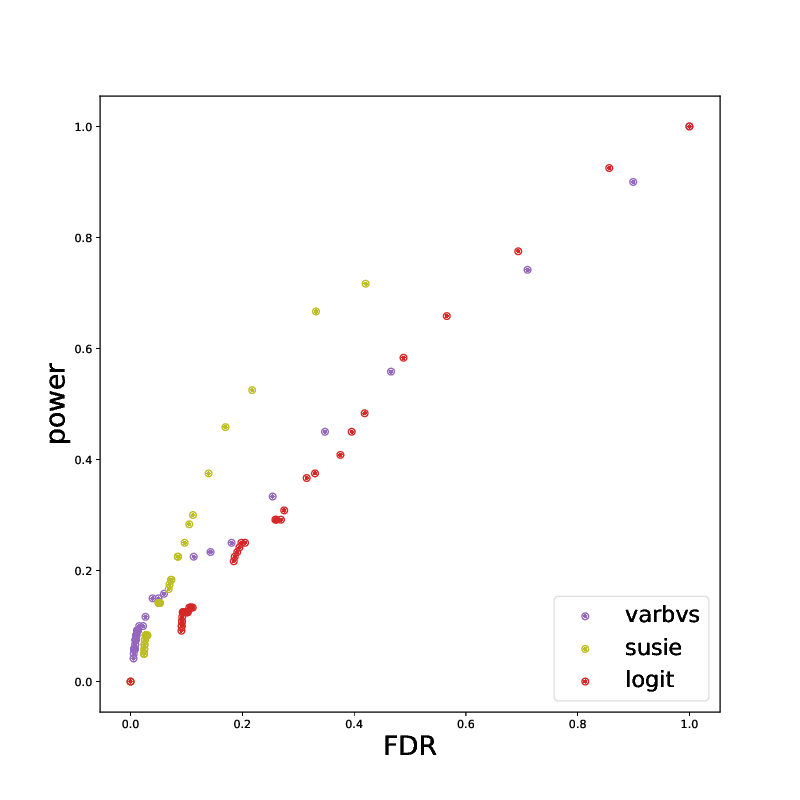

In [71]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.pdf -s png --dpi 80